[View in Colaboratory](https://colab.research.google.com/github/nishasinhmar/Student-Grade-Prediction/blob/master/Student_Grade_Prediction.ipynb)

In [1]:

!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package libfuse2:amd64.
(Reading database ... 21063 files and directories currently installed.)
Preparing to unpack .../libfuse2_2.9.7-1ubuntu1_amd64.deb ...
Unpacking libfuse2:amd64 (2.9.7-1ubuntu1) ...
Selecting previously unselected package fuse.
Preparing to unpack .../fuse_2.9.7-1ubuntu1_amd64.deb ...
Unpacking fuse (2.9.7-1ubuntu1) ...
Selecting previously unselected package google-drive-ocamlfuse.
Preparing to unpack .../google-drive-ocamlfuse_0.7.0-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.0-0ubuntu1~ubuntu18.04.1) ...
Setting up libfuse2:amd64 (2.9.7-1ubuntu1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...
Setting up fuse (2.9.7-1ubuntu1) ...
Setting up google-drive-ocamlfuse (0.7.0-0ubuntu1~ubuntu18.04.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleus

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [3]:
import os
os.getcwd()

'/content'

In [4]:
os.chdir('drive/Student-Grade-Prediction')
os.getcwd()

'/content/drive/Student-Grade-Prediction'

In [0]:
#Importing Useful Libraries
#Pre-Processing
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder

In [0]:
#Ml Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [7]:
#Splitting the data into training and testing 
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MinMaxScaler

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [0]:
#Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
#Plotting library - matplotlib
from matplotlib import pyplot as plt
#Python visualization library based on matplotlib
import seaborn as sns
#Offers data structures and operations for manipulating numerical tables
import pandas as pd
#Adds Python support for large, multi-dimensional arrays and matrices
import numpy as np

In [9]:
#load the data
data = pd.read_csv('student-mat.csv')
#let us have a look at our data
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [10]:
data.shape

(395, 33)

In [11]:
#the total no. of students
print('Total no. of students:',len(data))
#the no. of male students
print('No. of male students:',len(data[data['sex'] == 'M']))
#the no. of female students
print('No. of female students:',len(data[data['sex'] == 'F']))

('Total no. of students:', 395)
('No. of male students:', 187)
('No. of female students:', 208)


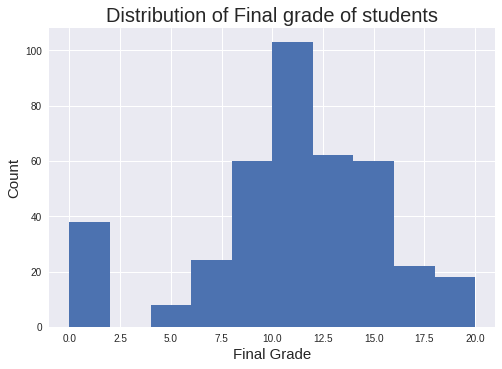

In [12]:
#histogram using matplotlib

b=data['G3'].plot.hist()
b.axes.set_title('Distribution of Final grade of students', fontsize = 20)
b.set_xlabel('Final Grade', fontsize = 15)
b.set_ylabel('Count', fontsize = 15)
plt.show()

/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


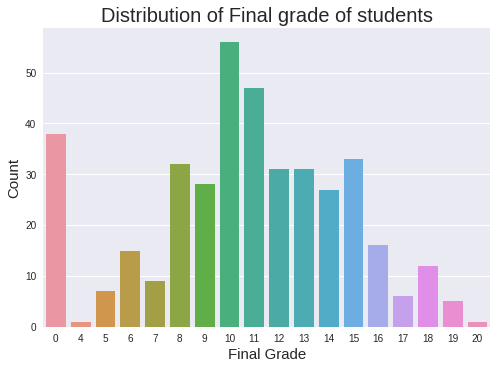

In [13]:
#Data Visualizations

#Distribution for final grade of students

b=sns.countplot(data['G3'])
b.axes.set_title('Distribution of Final grade of students', fontsize = 20)
b.set_xlabel('Final Grade', fontsize = 15)
b.set_ylabel('Count', fontsize = 15)
plt.show()


/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


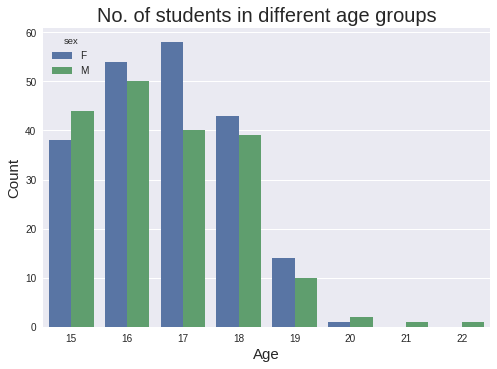

In [14]:
#No. of students in different age groups

b=sns.countplot('age',hue='sex', data=data)
b.axes.set_title('No. of students in different age groups', fontsize = 20)
b.set_xlabel('Age', fontsize = 15)
b.set_ylabel('Count', fontsize = 15)
plt.show()

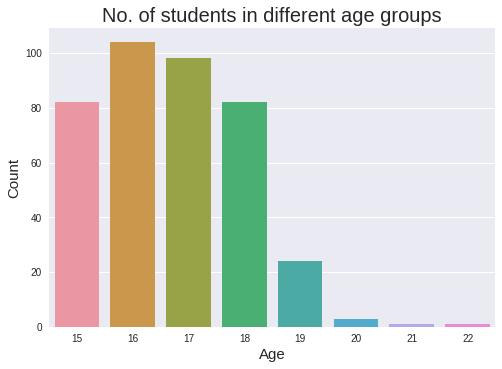

In [15]:
#Distribution of age for the students

b=sns.countplot(data['age'])
b.axes.set_title('No. of students in different age groups', fontsize = 20)
b.set_xlabel('Age', fontsize = 15)
b.set_ylabel('Count', fontsize = 15)
plt.show()

In [16]:
df2 = pd.get_dummies(data)#one-hot-encoding
most_correlated = df2.corr().abs()['G3'].sort_values(ascending=False) #Correlations

# obtain the top 10 most correlation features with Grade
most_correlated = most_correlated[:11]
most_correlated

G3             1.000000
G2             0.904868
G1             0.801468
failures       0.360415
Medu           0.217147
higher_yes     0.182465
higher_no      0.182465
age            0.161579
Fedu           0.152457
goout          0.132791
romantic_no    0.129970
Name: G3, dtype: float64

In [17]:
df2.shape

(395, 59)

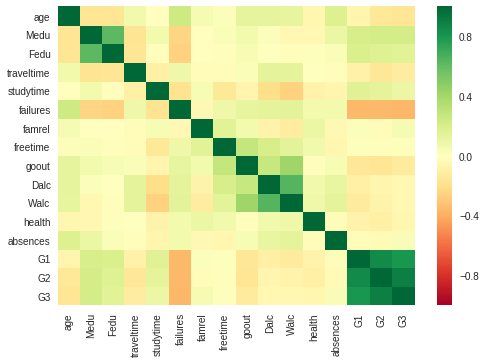

In [18]:
#Correlation Matrix
corr = data.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="RdYlGn", center=0)

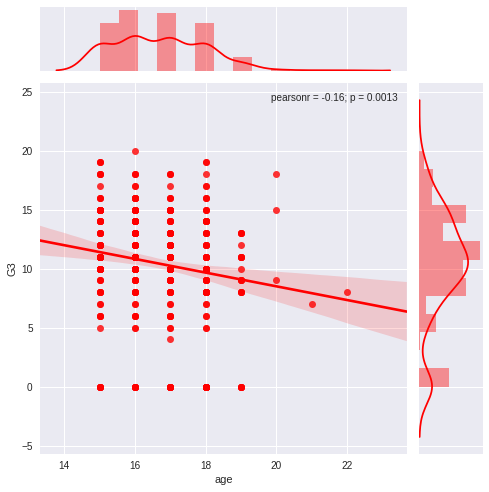

In [19]:
#Age vs Grades Distribution

#jointplot 

b=sns.jointplot(x="age", y="G3", data=data, size=7, kind='reg',color='red')

/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


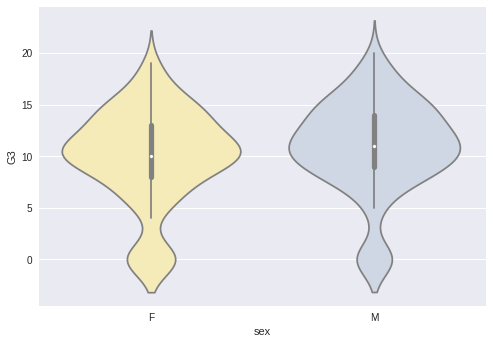

In [20]:
#Sex vs Grade Distribution

#violinplot
sns.violinplot(x="sex", y="G3", data=data,palette='Pastel2_r')

/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


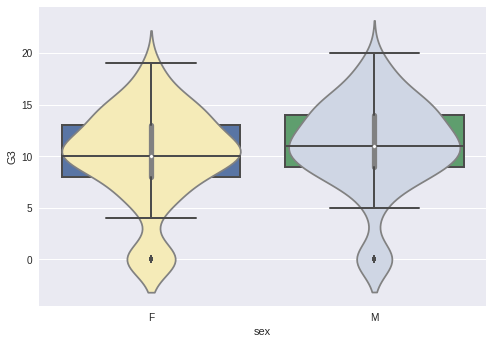

In [21]:
#let's try violin plot with box plot for better understanding

sns.violinplot(x="sex", y="G3", data=data,palette='Pastel2_r')
sns.boxplot(x='sex',y='G3',data=data,linewidth=2)

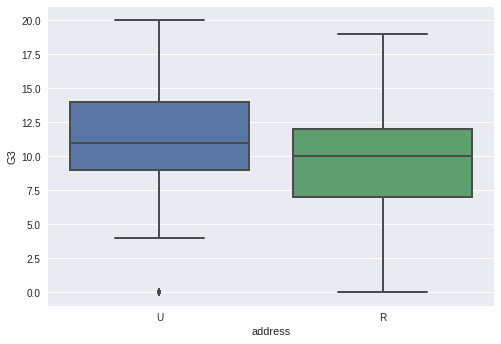

In [22]:
#Locality vs Grade Distribution

#Boxplot
sns.boxplot(x='address',y='G3',data=data,linewidth=2)

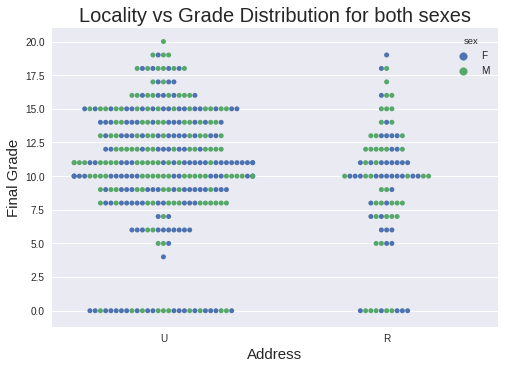

In [23]:
#Locality vs Grade Distribution for both sexes

#swarmplot
b=sns.swarmplot(x='address', y='G3',hue='sex', data=data)
b.axes.set_title('Locality vs Grade Distribution for both sexes', fontsize = 20)
b.set_xlabel('Address', fontsize = 15)
b.set_ylabel('Final Grade', fontsize = 15)
plt.show()

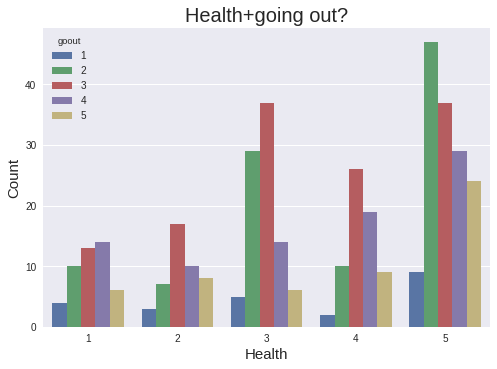

In [24]:
#Health+going out?

b=sns.countplot(x='health', hue='goout', data=data)
b.axes.set_title('Health+going out?', fontsize = 20)
b.set_xlabel('Health', fontsize = 15)
b.set_ylabel('Count', fontsize = 15)
plt.show()

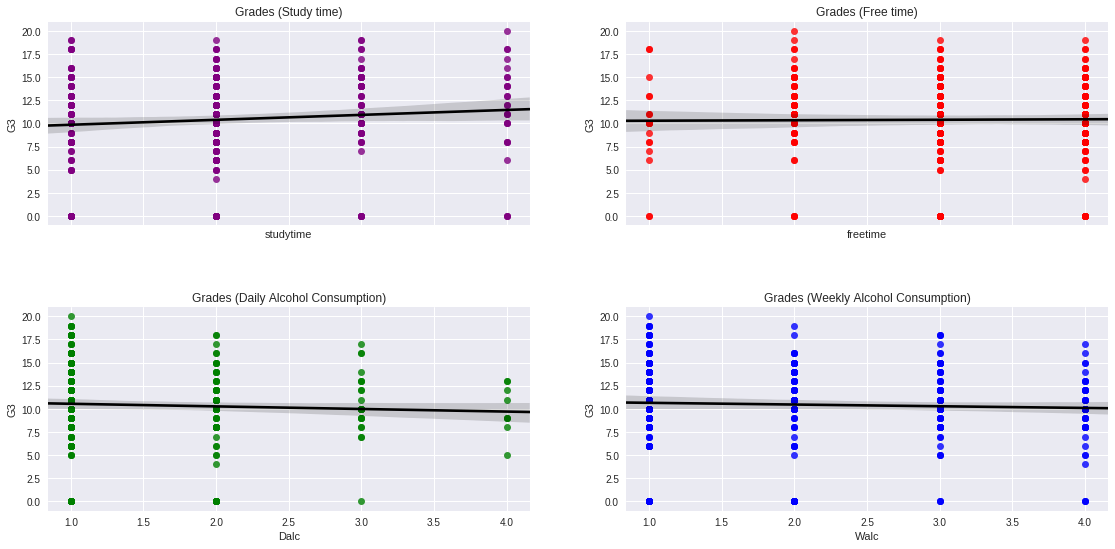

In [25]:
f, axes = plt.subplots(2, 2, figsize=(19, 9), sharex=True)
sns.despine(left=True)

sns.regplot( x=data["studytime"],y=data["G3"], color='purple', ax=axes[0, 0], line_kws={"color": "black"})
sns.regplot(x=data["freetime"],y=data["G3"], color='r', ax=axes[0, 1], line_kws={"color": "black"})
sns.regplot(y=data["G3"], x=data["Dalc"],  color='g', ax=axes[1, 0], line_kws={"color": "black"})
sns.regplot( x=data["Walc"], y=data["G3"],color='b', ax=axes[1, 1], line_kws={"color": "black"})

axes[0,0].set_title('Grades (Study time)')
axes[0,1].set_title('Grades (Free time)')
axes[1,0].set_title('Grades (Daily Alcohol Consumption)')
axes[1,1].set_title('Grades (Weekly Alcohol Consumption)')

plt.subplots_adjust(hspace=0.4)


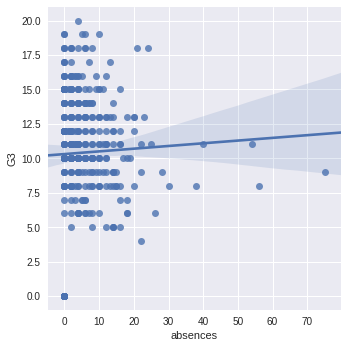

In [26]:
#Absences vs Grade Distribution

sns.lmplot(x='absences', y='G3', data=data,
           fit_reg=True) 

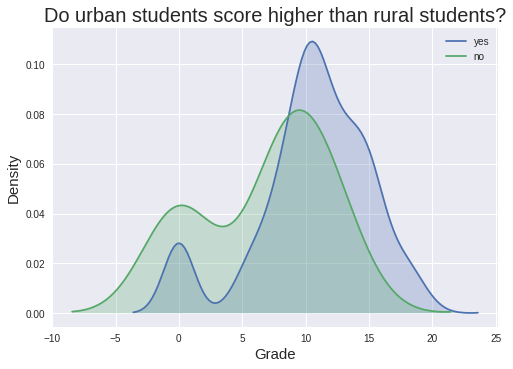

In [27]:
#Does aiming to pursue higher education affect grades?

sns.kdeplot(data.loc[data['higher'] == 'yes', 'G3'], label='yes', shade = True)
sns.kdeplot(data.loc[data['higher'] == 'no', 'G3'], label='no', shade = True)
plt.title('Do urban students score higher than rural students?', fontsize = 20)
plt.xlabel('Grade', fontsize = 15);
plt.ylabel('Density', fontsize = 15)
plt.show()

In [0]:
G3_actual=df2['G3']
X_train, X_test, y_train, y_test = train_test_split(df2, G3_actual, test_size=0.1, random_state=7)

In [0]:
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    
    return mae, rmse

In [0]:
# find the median
median_pred = X_train['G3'].median()

# create a list with all values as median
median_preds = [median_pred for _ in range(len(X_test))]

# store the true G3 values for passing into the function
true = X_test['G3']

In [31]:
# Display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

Median Baseline  MAE: 3.2000
Median Baseline RMSE: 3.9370


In [0]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
    X_train = X_train.drop('G3', axis='columns')
    X_test = X_test.drop('G3', axis='columns')
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=100)
    model4 = ExtraTreesRegressor(n_estimators=100)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=50)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]
    
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

In [33]:
results = evaluate(X_train, X_test, y_train, y_test)
results

,mae,rmse
Linear Regression,1.00855,1.4055
ElasticNet Regression,0.771849,0.966884
Random Forest,0.74325,1.25116
Extra Trees,0.78075,1.08759
SVM,0.94164,1.32603
Gradient Boosted,0.824043,1.32358
Baseline,3.2,3.937


In [0]:
X_train = X_train.drop('G3', axis='columns')
X_test = X_test.drop('G3', axis='columns')

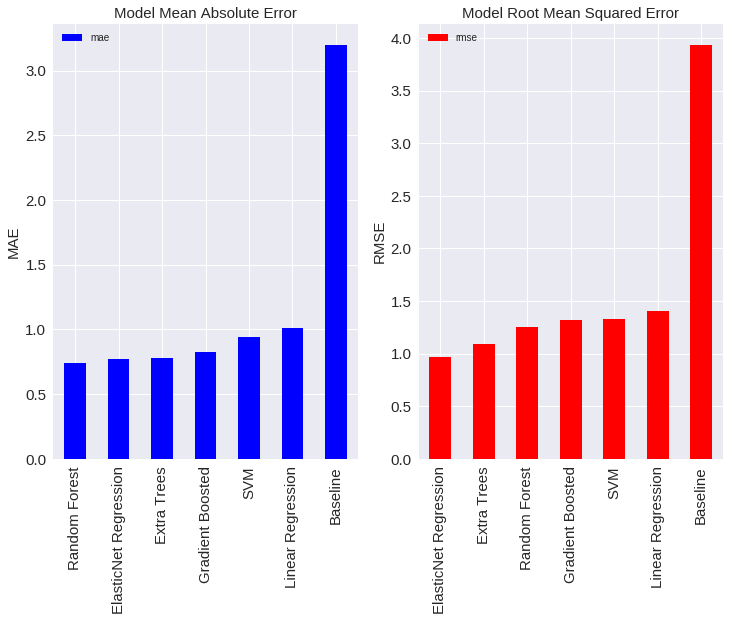

In [35]:
plt.figure(figsize=(12, 8))

# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'b', ax = ax, fontsize=15)
plt.title('Model Mean Absolute Error', fontsize=15) 
plt.ylabel('MAE', fontsize=15)

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax, fontsize=15)
plt.title('Model Root Mean Squared Error', fontsize=15) 
plt.ylabel('RMSE',fontsize=15)

plt.show()

In [36]:
# fit model no training data
model = GradientBoostingRegressor(n_estimators=50)
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [37]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
mae = np.mean(abs(predictions - y_test))
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
# evaluate predictions
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 52.50%
